In [58]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib as mpl

In [2]:
tickers = ['msft', 'tsla', 'aapl', 'nio', 'pltr', 'adsk', 'clf']

In [1]:
tickers = ['msft', 'tsla', 'aapl', 'nio', 'pltr', 'adsk', 'clf']
data = {}
for t in tickers:
    df = yf.Ticker(t).info
    data[t] = df
    
with open('yfdata.pkl', 'wb') as f:
    pickle.dump(data, f)

IndentationError: expected an indented block (Temp/ipykernel_13236/2436482868.py, line 8)

In [14]:
with open('yfdata.pkl', 'wb') as f:
    pickle.dump(data, f)

In [3]:
with open('data.pkl', 'rb') as f:
    data = pickle.load(f)

In [9]:
to_plot = [data[i]['priceToBook'] for i in tickers]
to_plot2 = [data[i]['revenueGrowth'] for i in tickers]
tickers, to_plot, to_plot2

width = .35
x = np.arange(len(tickers))

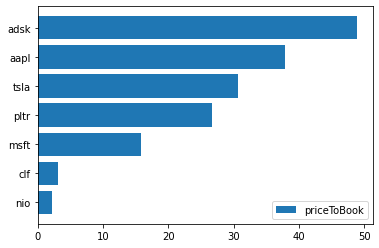

In [10]:
# sorted, horizontal one input
xy = zip(tickers, to_plot)
xy_sorted = sorted(xy, key=lambda x: x[1], reverse=False)

fig, ax = plt.subplots()

bar1 = plt.barh([i[0] for i in xy_sorted], [i[1] for i in xy_sorted], label='priceToBook')
ax.legend();

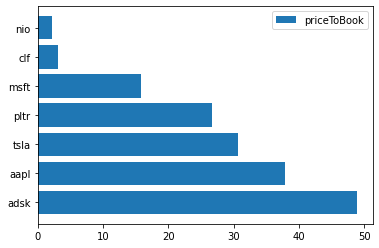

In [11]:
xy = zip(tickers, to_plot)
xy_sorted = sorted(xy, key=lambda x: x[1], reverse=True)

fig, ax = plt.subplots()

bar1 = plt.barh([i[0] for i in xy_sorted], [i[1] for i in xy_sorted], label='priceToBook')
ax.legend();

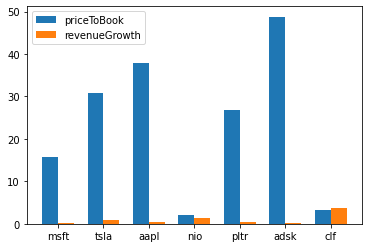

In [12]:
# vertical two inputs
fig, ax = plt.subplots()
bar1 = ax.bar(x - width / 2, to_plot, width=width, label='priceToBook')
bar2 = ax.bar(x + width / 2, to_plot2, width=width, label='revenueGrowth')
plt.xticks(x, tickers)
ax.legend();

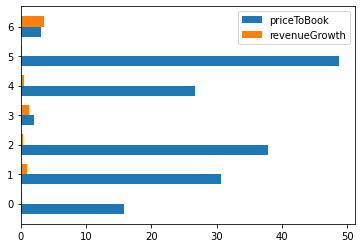

In [105]:
# horizontal two inputs
fig, ax = plt.subplots()
bar1 = ax.barh(x - width / 2, to_plot, height=width, label='priceToBook')
bar2 = ax.barh(x + width / 2, to_plot2, height=width, label='revenueGrowth')
ax.legend()

In [103]:
# If more than one data, what are we sorting on ?

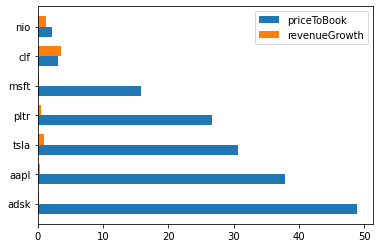

In [16]:
xy = zip(tickers, to_plot, to_plot2)
xy_sorted = sorted(xy, key=lambda x: x[1], reverse=True)

fig, ax = plt.subplots()
bar1 = ax.barh(x - width / 2, [i[1] for i in xy_sorted], height=width, label='priceToBook')
bar2 = ax.barh(x + width / 2, [i[2] for i in xy_sorted], height=width, label='revenueGrowth')
plt.yticks(x, [i[0] for i in xy_sorted])
ax.legend();

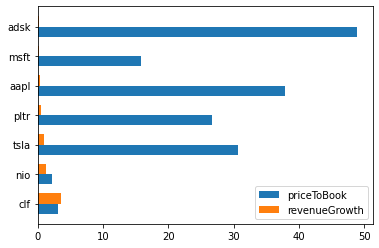

In [17]:
xy = zip(tickers, to_plot, to_plot2)
xy_sorted = sorted(xy, key=lambda x: x[2], reverse=True)

fig, ax = plt.subplots()
bar1 = ax.barh(x - width / 2, [i[1] for i in xy_sorted], height=width, label='priceToBook')
bar2 = ax.barh(x + width / 2, [i[2] for i in xy_sorted], height=width, label='revenueGrowth')
plt.yticks(x, [i[0] for i in xy_sorted])
ax.legend();

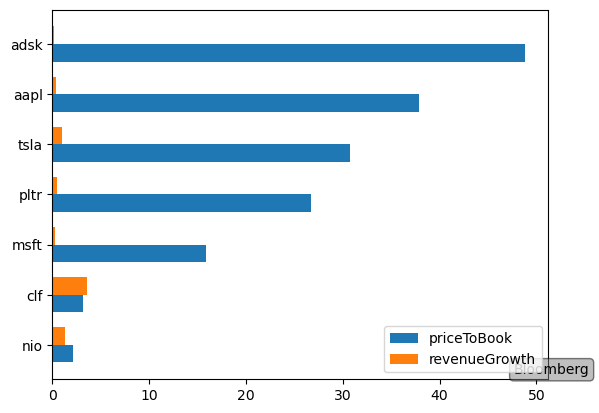

In [76]:
mpl.style.use('default')

xy = zip(tickers, to_plot, to_plot2)
xy_sorted = sorted(xy, key=lambda x: x[1], reverse=False)

fig, ax = plt.subplots()
bar1 = ax.barh(x - width / 2, [i[1] for i in xy_sorted], height=width, label='priceToBook')
bar2 = ax.barh(x + width / 2, [i[2] for i in xy_sorted], height=width, label='revenueGrowth')
plt.yticks(x, [i[0] for i in xy_sorted])
plt.text(.93, 0.015, 'Bloomberg', transform=ax.transAxes, bbox=dict(facecolor='grey', alpha=.5, boxstyle='round'))
ax.legend();

In [107]:
# display all styles

xy = zip(tickers, to_plot, to_plot2)
xy_sorted = sorted(xy, key=lambda x: x[1], reverse=False)

fig = plt.figure(dpi=100, figsize=(20, 35), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        fig, ax = plt.subplots(dpi=100, figsize=(16,12))
        ax.barh(x - width / 2, [i[1] for i in xy_sorted], height=width, label='priceToBook')
        ax.barh(x + width / 2, [i[2] for i in xy_sorted], height=width, label='revenueGrowth')
        plt.yticks(x, [i[0] for i in xy_sorted])
        ax.legend()
        fig.savefig(f'styles/{style}.png', bbox_inches="tight")
        fig.savefig(f'styles/{style}_transparent.png', bbox_inches="tight", transparent=True)
        plt.close()
#     with plt.style.context(style):
#         ax = fig.add_subplot(10, 3, i + 1)
#         ax.barh(x - width / 2, [i[1] for i in xy_sorted], height=width, label='priceToBook')
#         ax.barh(x + width / 2, [i[2] for i in xy_sorted], height=width, label='revenueGrowth')
#         ax.legend()
#     ax.set_title(style)

<Figure size 2000x3500 with 0 Axes>

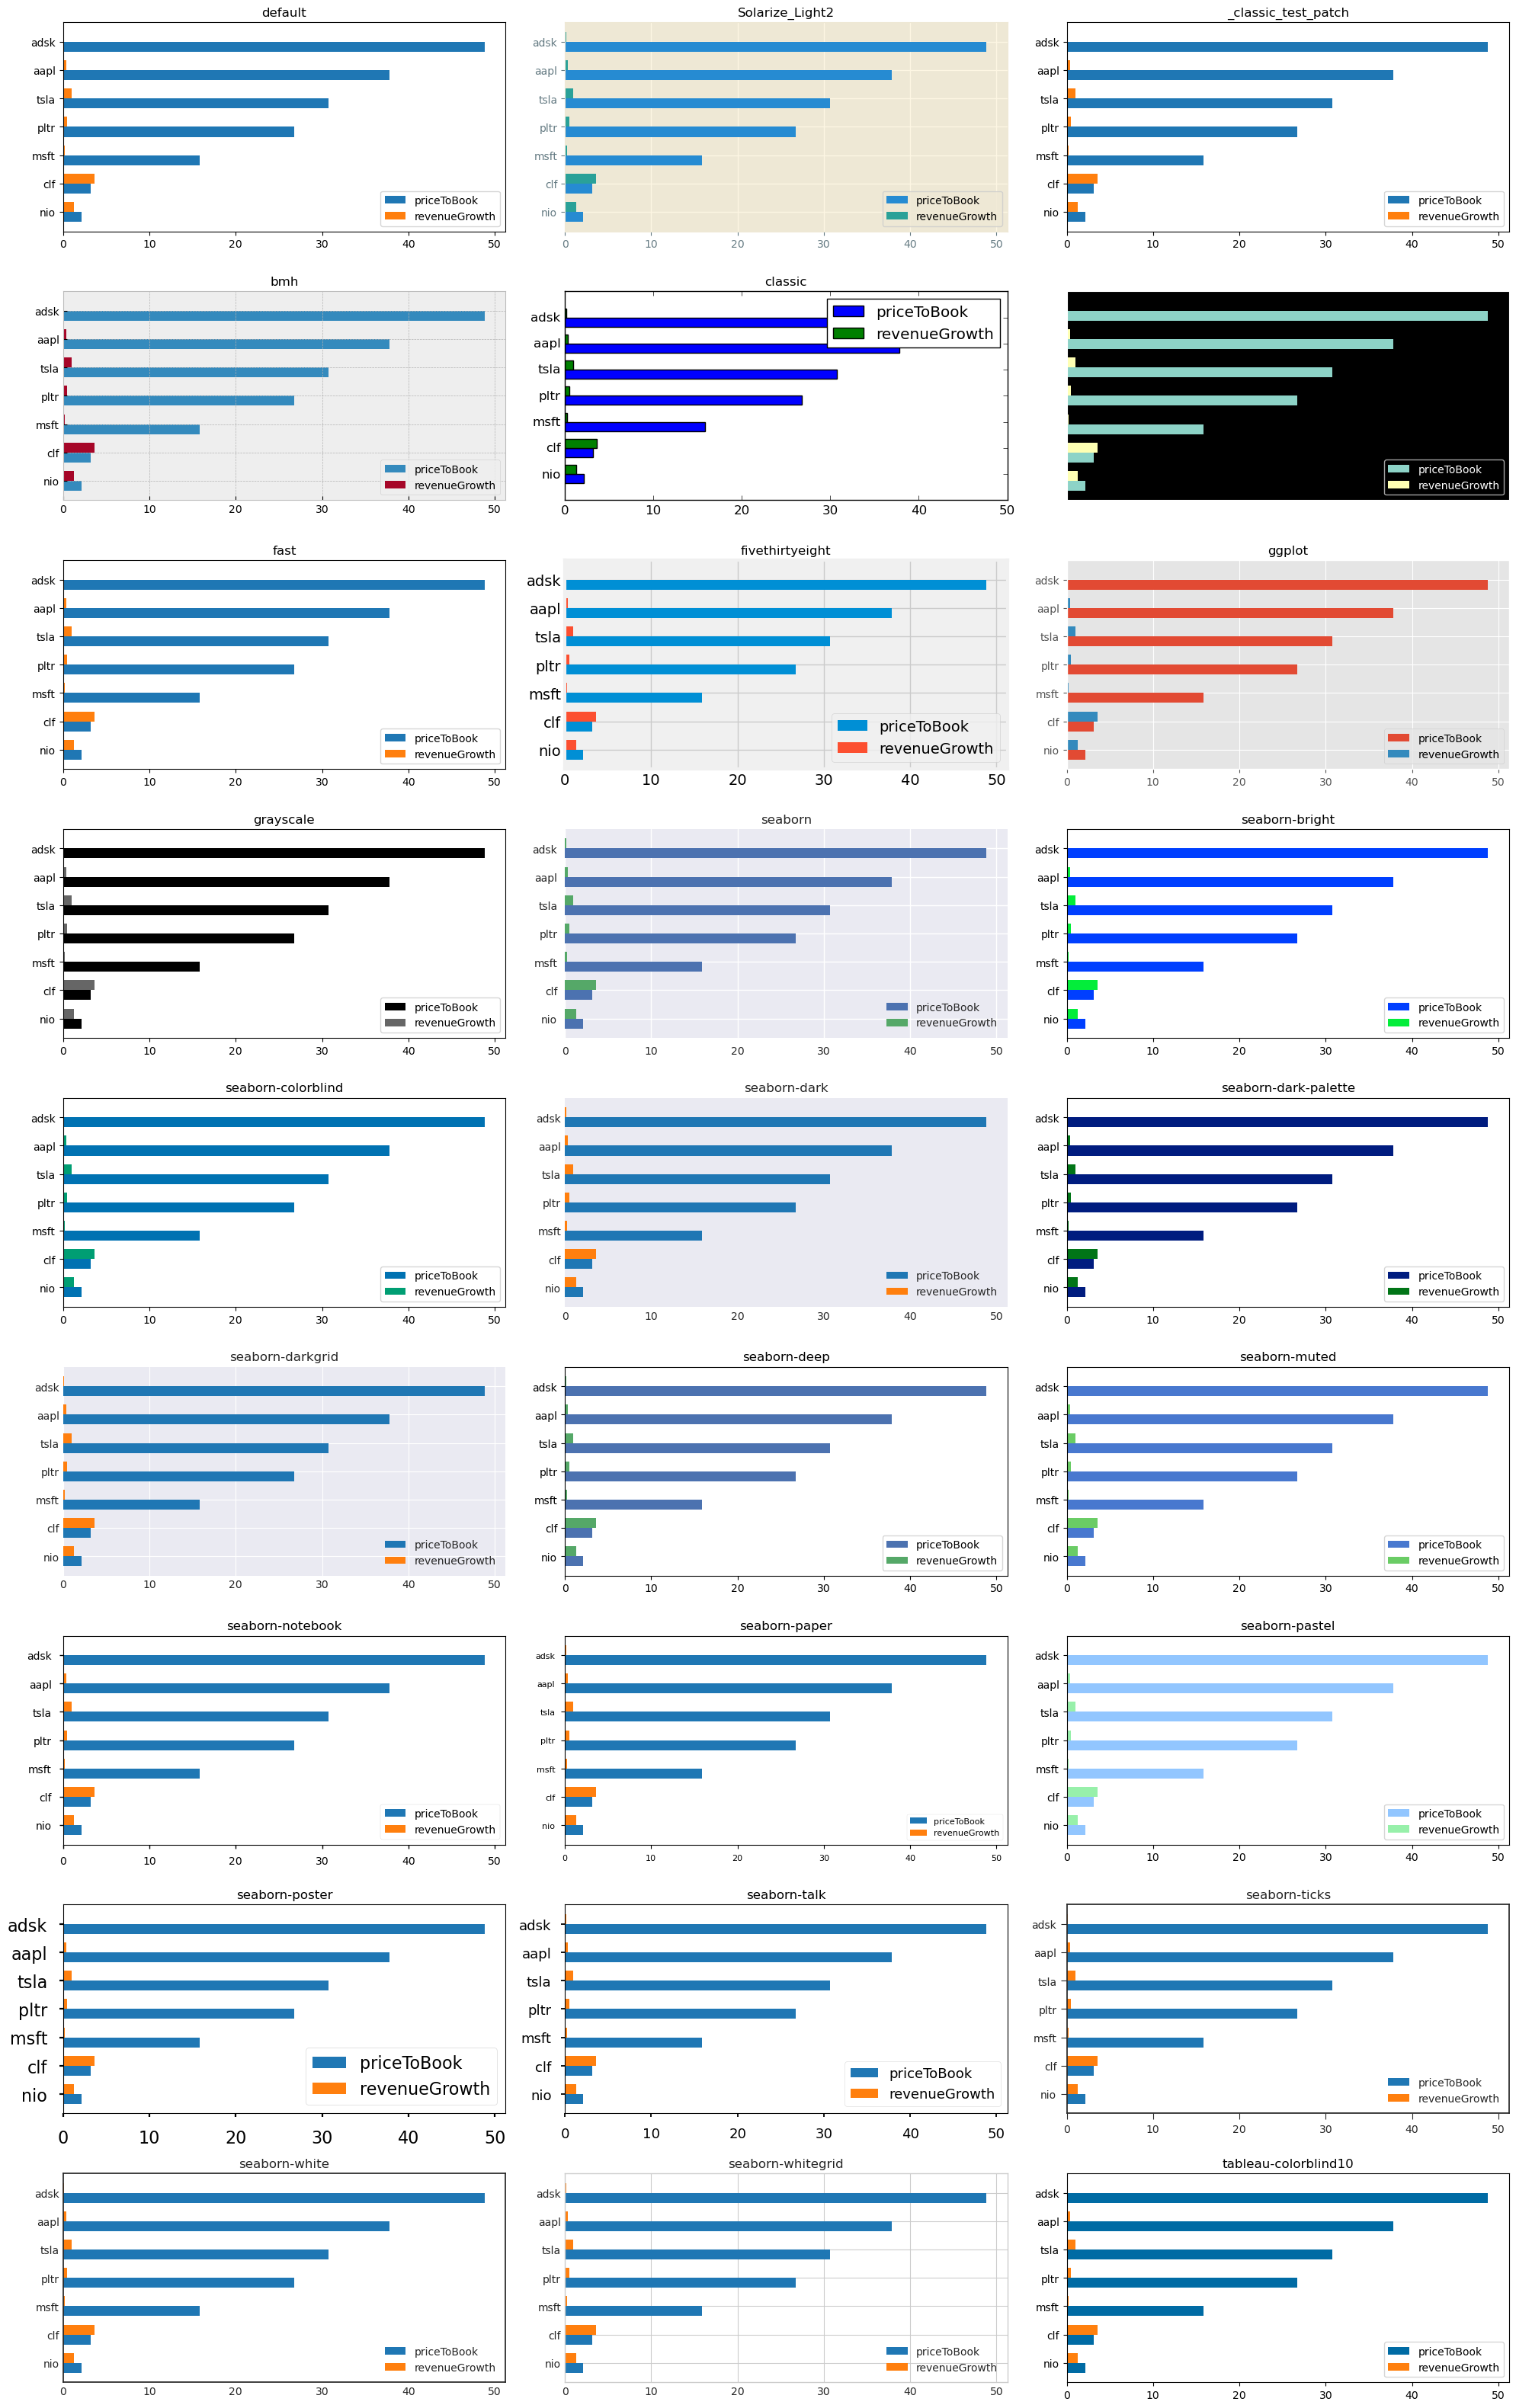

In [114]:
xy = zip(tickers, to_plot, to_plot2)
xy_sorted = sorted(xy, key=lambda x: x[1], reverse=False)

fig = plt.figure(dpi=100, figsize=(20, 35), tight_layout=True)
available = ['default'] + plt.style.available
for i, style in enumerate(available):
    with plt.style.context(style):
        ax = fig.add_subplot(10, 3, i+1)
        ax.barh(x - width / 2, [i[1] for i in xy_sorted], height=width, label='priceToBook')
        ax.barh(x + width / 2, [i[2] for i in xy_sorted], height=width, label='revenueGrowth')
        plt.yticks(x, [i[0] for i in xy_sorted])
        ax.legend()
    ax.set_title(style)
fig.savefig('styles/all_in_one_transparent.png', bbox_inches="tight", transparent=True)
fig.savefig('styles/all_in_one.png', bbox_inches="tight", transparent=False)